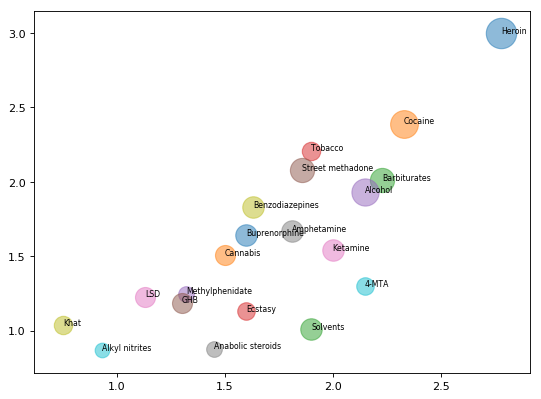

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotly import __version__
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode,plot,iplot
#init_notebook_mode(connected=True)

col_names=['Drug','sumMeanPhysandDep','MeanPhysicalHarm','MedianPhysicalHarm','MeanNAzero','AcuteHarm',
           'ChronicHarm','IVHarm','MeanDependence','Pleasure','Psychological','Physical',
           'MeanSocialHarm','Intoxication','SocialHarm','HealthCareCosts']
df = pd.read_excel('/Users/michaelwest/Documents/drugharmdependence/data.xlsx',names=col_names,
              )
#print(df)
#sns.pairplot(df, vars=['MeanPhysicalHarm','MeanDependence'])
#sns.distplot(df.ChronicHarm,df.MeanPhysicalHarm,df)

types = ['Heroin','Cocaine','Barbiturates','Tobacco','Alcohol','Street methadone','Ketamine','Amphetamine',
'Benzodiazepines','4-MTA','Buprenorphine','Cannabis','Solvents','Ecstasy','Methylphenidate','GHB','LSD',
'Anabolic steroids','Khat','Alkyl nitrites']
x_c = df.MeanPhysicalHarm
y_c = df.MeanDependence
plt.figure(figsize=(8,6), dpi=80)
for i, type in  enumerate(types):
    x = x_c[i]
    y = y_c[i]
    plt.scatter(x,y,s=df.SocialHarm[i] * 250,alpha=.5)
    plt.text(x,y,type,fontsize=7)

plt.show()
